In [1]:
#Daniel Smith 205212977

from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


[1.00000000e-03 1.77827941e-02 3.16227766e-01 5.62341325e+00
 1.00000000e+02]


In [2]:
%cd 'gdrive/MyDrive/MS_CS_Capstone/'

/content/gdrive/MyDrive/MS_CS_Capstone


In [ ]:
!unzip CS_Capstone_dataset.zip

Archive:  CS_Capstone_dataset.zip
replace fitness_tracker_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: fitness_tracker_dataset.csv  


In [3]:
#import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split

In [4]:
data = pd.read_csv('fitness_tracker_dataset.csv')

In [5]:
data

,user_id,date,steps,calories_burned,distance_km,active_minutes,sleep_hours,heart_rate_avg,workout_type,weather_conditions,location,mood
0,468,2023-01-01,4530,2543.02,16.10,613,1.5,176,Walking,Clear,Park,Tired
1,879,2023-01-01,11613,1720.76,8.10,352,6.3,128,Cycling,Fog,Park,Happy
2,152,2023-01-01,27335,1706.35,3.57,236,6.7,134,Yoga,Snow,Park,Neutral
3,311,2023-01-01,13459,2912.38,6.41,1329,11.6,116,Swimming,Rain,Office,Tired
4,759,2023-01-01,15378,3344.51,17.88,52,7.4,84,Swimming,Rain,Office,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...
999995,294,2025-09-26,21883,1711.42,4.62,124,7.9,174,Running,Fog,Other,Tired
999996,114,2025-09-26,15451,3961.63,1.93,1316,7.4,161,Cycling,Clear,Park,Tired
999997,85,2025-09-26,17912,3604.77,5.81,187,7.1,74,Swimming,Fog,Gym,Neutral
999998,109,2025-09-26,10072,2724.34,7.42,1203,6.0,74,Swimming,Snow,Gym,Tired


In [6]:
#all the feautres organized in the dataset

numerical_features =  ["steps","distance_km","active_minutes","sleep_hours"]
categorical_features = ["weather_conditions"]

In [7]:
Y = "calories_burned"

In [8]:
data = pd.concat([data[numerical_features], data[categorical_features],data[[Y]]], axis=1)

In [9]:
data

,steps,distance_km,active_minutes,sleep_hours,weather_conditions,calories_burned
0,4530,16.10,613,1.5,Clear,2543.02
1,11613,8.10,352,6.3,Fog,1720.76
2,27335,3.57,236,6.7,Snow,1706.35
3,13459,6.41,1329,11.6,Rain,2912.38
4,15378,17.88,52,7.4,Rain,3344.51
...,...,...,...,...,...,...
999995,21883,4.62,124,7.9,Fog,1711.42
999996,15451,1.93,1316,7.4,Clear,3961.63
999997,17912,5.81,187,7.1,Fog,3604.77
999998,10072,7.42,1203,6.0,Snow,2724.34


In [10]:
#get randomized subset of dataframe
subset_df = data.sample(n=10000, random_state=42)
subset_df
X = subset_df.drop(columns=[Y])
y = subset_df[Y]

In [11]:
X = pd.get_dummies(X, columns=categorical_features, drop_first=False)

In [12]:
X

,steps,distance_km,active_minutes,sleep_hours,weather_conditions_Clear,weather_conditions_Fog,weather_conditions_Rain,weather_conditions_Snow
987231,1653,14.76,841,4.2,False,False,False,True
79954,5769,16.43,243,4.0,False,False,False,True
567130,1917,2.19,1266,5.0,True,False,False,False
500891,12288,1.56,405,9.8,False,False,True,False
55399,15026,0.72,104,5.8,True,False,False,False
...,...,...,...,...,...,...,...,...
686403,13955,15.60,338,3.4,False,True,False,False
100678,25194,0.50,905,10.4,False,False,False,True
488468,18635,13.27,264,5.0,False,False,True,False
583782,1433,6.07,135,7.6,False,False,True,False


In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
X

,steps,distance_km,active_minutes,sleep_hours,weather_conditions_Clear,weather_conditions_Fog,weather_conditions_Rain,weather_conditions_Snow
987231,1653,14.76,841,4.2,False,False,False,True
79954,5769,16.43,243,4.0,False,False,False,True
567130,1917,2.19,1266,5.0,True,False,False,False
500891,12288,1.56,405,9.8,False,False,True,False
55399,15026,0.72,104,5.8,True,False,False,False
...,...,...,...,...,...,...,...,...
686403,13955,15.60,338,3.4,False,True,False,False
100678,25194,0.50,905,10.4,False,False,False,True
488468,18635,13.27,264,5.0,False,False,True,False
583782,1433,6.07,135,7.6,False,False,True,False


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
X_train

,steps,distance_km,active_minutes,sleep_hours,weather_conditions_Clear,weather_conditions_Fog,weather_conditions_Rain,weather_conditions_Snow
966368,1339,14.35,1005,4.2,False,True,False,False
87247,26135,18.18,1197,0.6,True,False,False,False
360687,22808,18.29,590,3.1,True,False,False,False
306428,27253,5.13,205,8.8,False,False,False,True
403725,7626,8.78,663,8.2,False,False,True,False
...,...,...,...,...,...,...,...,...
474797,1599,9.41,980,6.0,True,False,False,False
637713,6064,0.60,955,8.9,True,False,False,False
608525,18232,8.80,741,2.2,True,False,False,False
31741,27534,17.71,1269,10.4,False,False,True,False


In [17]:
X_mean, X_std = X_train.mean(), X_train.std()
scaled_X_train = ((X_train - X_mean) / X_std).values


In [18]:
scaled_X_train

array([[-1.58604955,  0.73443862,  0.67936848, ...,  1.72848558,
        -0.56692168, -0.58039321],
       [ 1.27191993,  1.39733643,  1.14008091, ..., -0.57846881,
        -0.56692168, -0.58039321],
       [ 0.88845226,  1.41637527, -0.31644226, ..., -0.57846881,
        -0.56692168, -0.58039321],
       ...,
       [ 0.36102572, -0.22615741,  0.04588888, ..., -0.57846881,
        -0.56692168, -0.58039321],
       [ 1.43316769,  1.31598865,  1.31284807, ..., -0.57846881,
         1.76369159, -0.58039321],
       [ 0.45403998, -1.35464139, -0.17966825, ...,  1.72848558,
        -0.56692168, -0.58039321]])

In [19]:
cov_matrix = np.cov(scaled_X_train, rowvar=False)

In [20]:
cov_matrix

array([[ 1.00000000e+00,  1.08450167e-02, -2.64723252e-02,
        -1.13907727e-02,  6.48843747e-04, -9.58196572e-03,
         8.00150432e-03,  1.00840358e-03],
       [ 1.08450167e-02,  1.00000000e+00,  1.10627831e-02,
        -5.45073612e-03,  2.21406935e-03,  1.33607423e-02,
        -1.91556833e-02,  3.37137918e-03],
       [-2.64723252e-02,  1.10627831e-02,  1.00000000e+00,
         1.24619399e-02,  1.96578133e-02, -1.36216262e-02,
        -2.00776472e-02,  1.37309230e-02],
       [-1.13907727e-02, -5.45073612e-03,  1.24619399e-02,
         1.00000000e+00,  1.29254443e-02, -1.12129197e-02,
        -4.57926687e-03,  2.76044443e-03],
       [ 6.48843747e-04,  2.21406935e-03,  1.96578133e-02,
         1.29254443e-02,  1.00000000e+00, -3.37562768e-01,
        -3.30824492e-01, -3.38685744e-01],
       [-9.58196572e-03,  1.33607423e-02, -1.36216262e-02,
        -1.12129197e-02, -3.37562768e-01,  1.00000000e+00,
        -3.27987509e-01, -3.35781347e-01],
       [ 8.00150432e-03, -1.915568

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

None


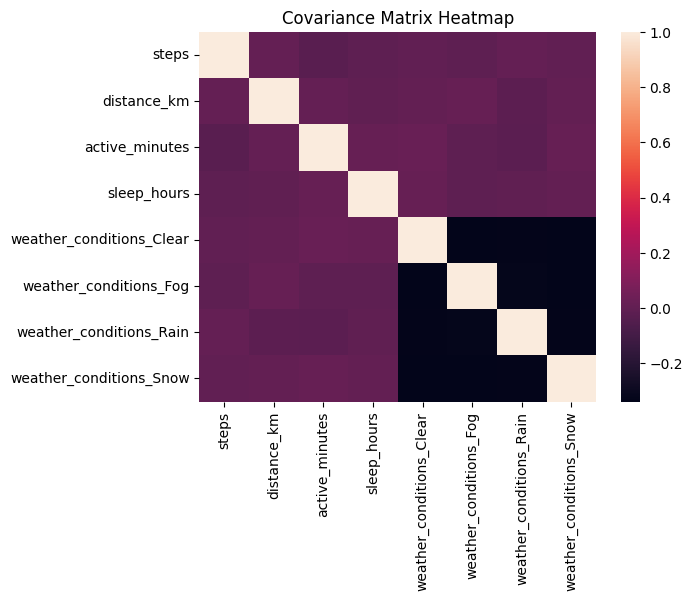

In [22]:

features = X.columns.tolist()
# Create a heatmap using seaborn
sns.heatmap(cov_matrix, xticklabels= features, yticklabels=features)

# Add labels and title
plt.title("Covariance Matrix Heatmap")
plt.show()

In [23]:
scaler = StandardScaler()
scaled_y_train = scaler.fit_transform(y_train.values.reshape(-1, 1))
pipelined_training_y = pd.DataFrame(scaled_y_train, columns=[Y])
y_mean, y_std = y_train.mean(), y_train.std()

In [24]:
print(y_mean)
print(y_std)

2749.9473525
724.1491316553343


In [25]:
print(X_mean)
print(X_std)

steps                       15099.708375
distance_km                    10.106661
active_minutes                721.876000
sleep_hours                     6.005187
weather_conditions_Clear        0.254000
weather_conditions_Fog          0.250750
weather_conditions_Rain         0.243250
weather_conditions_Snow         0.252000
dtype: float64
steps                       8676.089860
distance_km                    5.777663
active_minutes               416.745860
sleep_hours                    3.467322
weather_conditions_Clear       0.435325
weather_conditions_Fog         0.433472
weather_conditions_Rain        0.429072
weather_conditions_Snow        0.434188
dtype: float64


In [26]:
scaled_y_train

array([[ 0.03024794],
       [-1.12490402],
       [-0.3003538 ],
       ...,
       [-0.49622349],
       [ 0.47356831],
       [ 1.40402874]])

In [27]:
pipelined_training_y

,calories_burned
0,0.030248
1,-1.124904
2,-0.300354
3,1.645334
4,0.239472
...,...
7995,-0.111583
7996,1.464835
7997,-0.496223
7998,0.473568


In [28]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

In [29]:
scaled_X_train

array([[-1.58604955,  0.73443862,  0.67936848, ...,  1.72848558,
        -0.56692168, -0.58039321],
       [ 1.27191993,  1.39733643,  1.14008091, ..., -0.57846881,
        -0.56692168, -0.58039321],
       [ 0.88845226,  1.41637527, -0.31644226, ..., -0.57846881,
        -0.56692168, -0.58039321],
       ...,
       [ 0.36102572, -0.22615741,  0.04588888, ..., -0.57846881,
        -0.56692168, -0.58039321],
       [ 1.43316769,  1.31598865,  1.31284807, ..., -0.57846881,
         1.76369159, -0.58039321],
       [ 0.45403998, -1.35464139, -0.17966825, ...,  1.72848558,
        -0.56692168, -0.58039321]])

In [31]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:

mlp_mse_ls = []
for train_index, val_index in kf.split(scaled_X_train):

  X_train_kf, X_val_kf = scaled_X_train[train_index], scaled_X_train[val_index]
  y_train_kf, y_val_kf = scaled_y_train[train_index], scaled_y_train[val_index]

  mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=100, random_state=42)
  mlp.fit(X_train_kf, y_train_kf)
  y_pred = mlp.predict(X_val_kf)
  mlp_mse_ls.append(mean_squared_error(y_val_kf, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1631: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't conver

In [ ]:
print(mlp_mse_ls)
print(np.mean(mlp_mse_ls))

[1.0419647308154127, 0.9891677647123405, 1.013917981885901, 0.9939356941308033, 1.02732498337274]
1.0132622309834394


In [34]:
from sklearn.linear_model import LinearRegression

lr_mse_ls = []
for train_index, val_index in kf.split(scaled_X_train):

  X_train_kf, X_val_kf = scaled_X_train[train_index], scaled_X_train[val_index]
  y_train_kf, y_val_kf = scaled_y_train[train_index], scaled_y_train[val_index]
  reg = LinearRegression().fit(X_train_kf,y_train_kf)
  print(reg.coef_)
  print(reg.intercept_)
  lr_mse_ls.append(mean_squared_error(y_val_kf, reg.predict(X_val_kf)))

[[ 3.18019513e-03  1.22780992e-02 -7.71143331e-03 -2.50046581e-02
   1.64115784e+13  1.63417261e+13  1.61758354e+13  1.63687362e+13]]
[0.00145953]
[[ 9.50278306e-04  7.03637386e-04 -1.20860142e-02 -1.42004975e-02
   1.44653805e+12  1.44038118e+12  1.42575935e+12  1.44276188e+12]]
[0.00723507]
[[ 6.03071133e-03  7.67355367e-03 -3.47386155e-03 -2.25371324e-02
   3.17637157e+11  3.16285203e+11  3.13074480e+11  3.16807969e+11]]
[0.00767192]
[[ 1.10212809e-02  1.08481134e-02 -8.16313535e-03 -7.37280067e-03
   7.53613244e+11  7.50405652e+11  7.42788018e+11  7.51645946e+11]]
[0.00129075]
[[ 7.55986053e-03  8.21738750e-03 -1.36786889e-02 -3.15608126e-02
   1.44323206e+12  1.43708926e+12  1.42250085e+12  1.43946452e+12]]
[-0.0086603]


In [33]:
print(lr_mse_ls)
print(np.mean(lr_mse_ls))

[1.0253255948991618, 0.9831046522009802, 1.0004539917017423, 0.9840151568185442, 1.0120122901986217]
1.00098233716381


In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
y_mean

2749.9473525

In [ ]:
n_estimators = [20,40,60,80,100]
rf_mse_list = []

for i in n_estimators:
  rf_model = RandomForestRegressor(n_estimators=i, random_state=42)
  rf_err_ls = []
  for train_index, val_index in kf.split(scaled_X_train):
    X_train_kf, X_val_kf = scaled_X_train[train_index], scaled_X_train[val_index]
    y_train_kf, y_val_kf = scaled_y_train[train_index], scaled_y_train[val_index]
    rf_model.fit(X_train_kf, y_train_kf)
    y_pred = rf_model.predict(X_val_kf)
    mse = mean_squared_error(y_val_kf , y_pred)
    rf_err_ls.append(mse)
    print(mse)
  rf_mse_list.append(np.mean(rf_err_ls))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.1300558375553247


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0674937856737323


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.1234282713489352


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.085720391968858


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.1273662287508202


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.1067901456835276


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0411119017245227


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.1009116269435644


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.062120684904115


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0982099769222848


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0979563394725558


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0337560449874021


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.089975782090612


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.054530435646421


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0987708950994375


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0945154139574376


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.029108994388252


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0845003939656717


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0487698354322401


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0962880807432713


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0887923186194441


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.026231693332762


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0785608942965315


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0472289655094147


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


1.0952695587066794


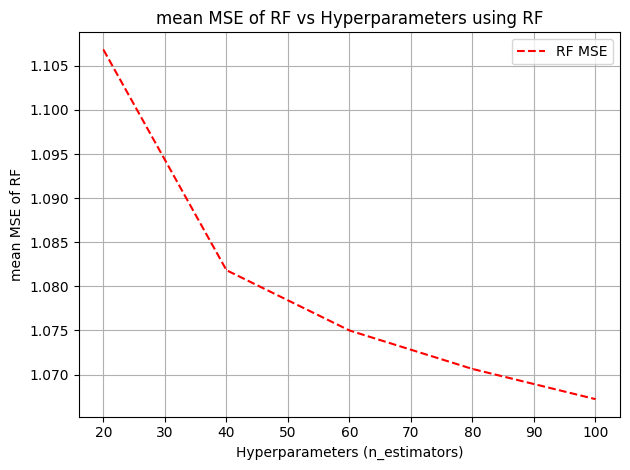

In [ ]:
plt.plot(n_estimators , [i.item() for i in rf_mse_list], marker=',', linestyle='--', color='r', label='RF MSE')
plt.xlabel('Hyperparameters (n_estimators)')
plt.ylabel('mean MSE of RF')
plt.title('mean MSE of RF vs Hyperparameters using RF')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
print(f"mse for RF: {rf_mse_list}")

mse for RF: [1.1068129030595342, 1.081828867235603, 1.0749978994592857, 1.0706365436973744, 1.0672166860929664]


In [ ]:
y_test

,calories_burned
335051,3698.21
412385,2340.60
308919,3844.93
128924,2416.59
877313,2522.10
...,...
297141,1667.11
830314,3120.96
601034,2296.02
780204,1689.15


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import pandas as pd
import numpy as np
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F


In [ ]:
(X_train.values - X_mean.values) / X_std.values

array([[-1.586049545051567, 0.7344386238857837, 0.6793684761463648, ...,
        1.7284855764039488, -0.5669216788561302, -0.58039321448692],
       [1.2719199320538335, 1.397336425642137, 1.1400809110515726, ...,
        -0.5784688131909111, -0.5669216788561302, -0.58039321448692],
       [0.8884522578188897, 1.416375265901458, -0.3164422555497873, ...,
        -0.5784688131909111, -0.5669216788561302, -0.58039321448692],
       ...,
       [0.3610257242153119, -0.22615740737995, 0.045888878151704185, ...,
        -0.5784688131909111, -0.5669216788561302, -0.58039321448692],
       [1.4331676856620952, 1.3159886536250391, 1.3128480741410253, ...,
        -0.5784688131909111, 1.7636915949614658, -0.58039321448692],
       [0.45403997522450934, -1.3546413936596953, -0.17966825143730375,
        ..., 1.7284855764039488, -0.5669216788561302, -0.58039321448692]],
      dtype=object)

In [ ]:
X_mean.values

array([1.50997084e+04, 1.01066613e+01, 7.21876000e+02, 6.00518750e+00,
       2.54000000e-01, 2.50750000e-01, 2.43250000e-01, 2.52000000e-01])

In [ ]:
X_test.values

array([[3273, 16.66, 795, ..., False, True, False],
       [170, 1.37, 641, ..., False, True, False],
       [11100, 0.32, 806, ..., False, False, True],
       ...,
       [25157, 7.91, 1188, ..., False, True, False],
       [27986, 0.63, 228, ..., False, False, True],
       [25893, 12.96, 366, ..., False, False, True]], dtype=object)

In [ ]:
X_train_tensor = torch.tensor(scaled_X_train.astype(float), dtype=torch.float32)
y_train_tensor = torch.tensor(scaled_y_train.astype(float), dtype=torch.float32)
X_test_tensor = torch.tensor(((X_train.values - X_mean.values) / X_std.values).astype(float), dtype=torch.float32)
y_test_tensor = torch.tensor(((y_test.values - y_mean)/y_std).astype(float), dtype=torch.float32)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:
y_test_tensor

tensor([ 1.3095, -0.5653,  1.5121,  ..., -0.6268, -1.4649, -1.4505])

In [ ]:
num_features = X_train_tensor.shape[1]
num_labels = 1
hidden_layers=[15,20]
print(num_labels)

1


In [ ]:
class FCN(nn.Module):
    def __init__(self, num_features, num_labels = 1, hidden_layers = [15,20]):
        super(FCN, self).__init__()
        self.fc1 = nn.Linear(num_features, hidden_layers[0])
        self.bn1 = nn.BatchNorm1d(hidden_layers[0])
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_layers[0] , hidden_layers[1] )
        self.bn2 = nn.BatchNorm1d(hidden_layers[1])
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_layers[1], num_labels)


    def forward(self, x):
        out = self.fc1(x)
        out = self.bn1(out)
        out = self.relu1(out)
        out = self.fc2(out)
        out = self.bn2(out)
        out = self.relu2(out)
        out = self.fc3(out)
        return out

def l2_penalty(model):
    l2_regularization = torch.tensor(0.)
    for param in model.parameters():
          l2_regularization += torch.norm(param, p=2)**2
    return l2_regularization

def l1_penalty(model):
    l1_regularization = torch.tensor(0.)
    for param in model.parameters():
          l1_regularization += torch.norm(param, p=1)
    return l1_regularization

def get_accuracy(model,X_test_tensor,y_test_tensor):
  model.eval()
  with torch.no_grad():
      outputs = model(X_test_tensor)
      _, predicted = torch.max(outputs, 1)
      accuracy = (predicted == y_test_tensor).sum().item() / len(y_test_tensor)
      return accuracy


In [ ]:
def train_model(model,lam,regression_penalty = None):
  num_epochs = 50
  criterion = nn.MSELoss()
  # criterion = nn.SmoothL1Loss()
  optimizer = optim.Adam(model.parameters(), lr=0.001) #Adam Optimzer, based off of SGD
  for epoch in range(num_epochs):
      model.train()
      epoch_loss = 0.0
      for inputs, targets in train_loader:
          # Forward pass
          outputs = model(inputs)
          loss = criterion(outputs, targets)
          # L2 penalty (weight decay)
          if regression_penalty != None:
            loss += lam * regression_penalty(model)
          else:
            loss = loss

          # Backward pass and optimization
          optimizer.zero_grad()
          loss.backward()
          optimizer.step()

          epoch_loss += loss.item() * inputs.size(0)

      epoch_loss /= len(train_loader.dataset)
  return loss





In [ ]:

l2_accuracy_list = []
l1_accuracy_list = []
no_regularizer = []
lambda_list = np.logspace(-3, 2, num=5)
for l in lambda_list:
  l2_model = FCN(num_features,num_labels, hidden_layers=hidden_layers)
  train_model(l2_model,lam= l,regression_penalty = l2_penalty)
  l2_accuracy_list.append(F.mse_loss(l2_model(X_test_tensor),y_test_tensor))
  l1_model = FCN(num_features,num_labels, hidden_layers=hidden_layers)
  train_model(l1_model,lam= l,regression_penalty = l1_penalty)
  l1_accuracy_list.append(F.mse_loss(l1_model(X_test_tensor),y_test_tensor))
  no_reg_model = FCN(num_features,num_labels, hidden_layers=hidden_layers)
  train_model(no_reg_model,lam= l,regression_penalty = None)
  no_regularizer.append(F.mse_loss(no_reg_model(X_test_tensor),y_test_tensor))
  model_scripted = torch.jit.script(l1_model) # Export to TorchScript
  model_scripted.save(f'train_model{l}.pt') # Save
  print(l2_accuracy_list)
  print(l1_accuracy_list)
  print(no_regularizer)

<ipython-input-77-49959f5ee9c1>:8: UserWarning: Using a target size (torch.Size([2000])) that is different to the input size (torch.Size([8000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  l2_accuracy_list.append(F.mse_loss(l2_model(X_test_tensor),y_test_tensor))
<ipython-input-77-49959f5ee9c1>:11: UserWarning: Using a target size (torch.Size([2000])) that is different to the input size (torch.Size([8000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  l1_accuracy_list.append(F.mse_loss(l1_model(X_test_tensor),y_test_tensor))
<ipython-input-77-49959f5ee9c1>:14: UserWarning: Using a target size (torch.Size([2000])) that is different to the input size (torch.Size([8000, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  no_regularizer.append(F.mse_loss(no_reg_model(X_test_tensor),y_test_tensor))


[tensor(0.9642, grad_fn=<MseLossBackward0>)]
[tensor(0.9627, grad_fn=<MseLossBackward0>)]
[tensor(0.9689, grad_fn=<MseLossBackward0>)]
[tensor(0.9642, grad_fn=<MseLossBackward0>), tensor(0.9627, grad_fn=<MseLossBackward0>)]
[tensor(0.9627, grad_fn=<MseLossBackward0>), tensor(0.9624, grad_fn=<MseLossBackward0>)]
[tensor(0.9689, grad_fn=<MseLossBackward0>), tensor(0.9678, grad_fn=<MseLossBackward0>)]
[tensor(0.9642, grad_fn=<MseLossBackward0>), tensor(0.9627, grad_fn=<MseLossBackward0>), tensor(0.9625, grad_fn=<MseLossBackward0>)]
[tensor(0.9627, grad_fn=<MseLossBackward0>), tensor(0.9624, grad_fn=<MseLossBackward0>), tensor(0.9625, grad_fn=<MseLossBackward0>)]
[tensor(0.9689, grad_fn=<MseLossBackward0>), tensor(0.9678, grad_fn=<MseLossBackward0>), tensor(0.9682, grad_fn=<MseLossBackward0>)]
[tensor(0.9642, grad_fn=<MseLossBackward0>), tensor(0.9627, grad_fn=<MseLossBackward0>), tensor(0.9625, grad_fn=<MseLossBackward0>), tensor(0.9626, grad_fn=<MseLossBackward0>)]
[tensor(0.9627, grad_f

In [ ]:
print(l2_accuracy_list)
print(l1_accuracy_list)
print(no_regularizer)

[tensor(0.9642, grad_fn=<MseLossBackward0>), tensor(0.9627, grad_fn=<MseLossBackward0>), tensor(0.9625, grad_fn=<MseLossBackward0>), tensor(0.9626, grad_fn=<MseLossBackward0>), tensor(0.9625, grad_fn=<MseLossBackward0>)]
[tensor(0.9627, grad_fn=<MseLossBackward0>), tensor(0.9624, grad_fn=<MseLossBackward0>), tensor(0.9625, grad_fn=<MseLossBackward0>), tensor(0.9625, grad_fn=<MseLossBackward0>), tensor(0.9625, grad_fn=<MseLossBackward0>)]
[tensor(0.9689, grad_fn=<MseLossBackward0>), tensor(0.9678, grad_fn=<MseLossBackward0>), tensor(0.9682, grad_fn=<MseLossBackward0>), tensor(0.9689, grad_fn=<MseLossBackward0>), tensor(0.9700, grad_fn=<MseLossBackward0>)]


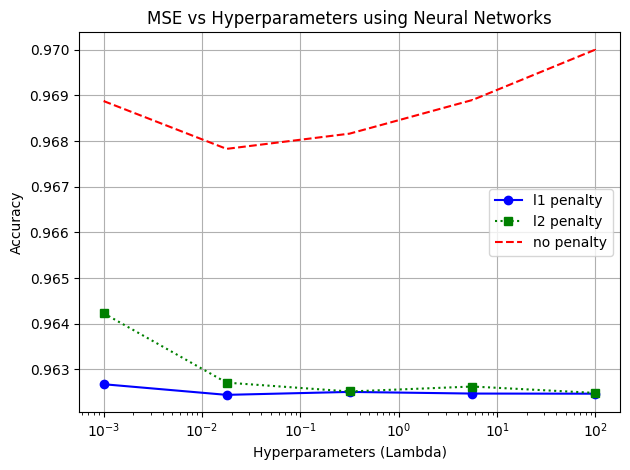

In [ ]:
import matplotlib.pyplot as plt
hyperparameters = lambda_list

plt.plot(hyperparameters, [i.item() for i in l1_accuracy_list], marker='o', linestyle='-', color='b', label='l1 penalty')

# Plotting second set of accuracies
plt.plot(hyperparameters, [i.item() for i in l2_accuracy_list], marker='s', linestyle=':', color='g', label='l2 penalty')

plt.plot(hyperparameters, [i.item() for i in no_regularizer], marker=',', linestyle='--', color='r', label='no penalty')

plt.xscale('log')  # Use logarithmic scale for hyperparameters if needed
plt.xlabel('Hyperparameters (Lambda)')
plt.ylabel('Accuracy')
plt.title('MSE vs Hyperparameters using Neural Networks')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.svm import SVR

svr_mse_list = []
svr_err_list = []
e_parameters = [0,0.1,0.2,0.3]



for i in e_parameters:
  svr_model = SVR(kernel='rbf', C=1.0, epsilon=i)
  for train_index, val_index in kf.split(scaled_X_train):
    X_train_kf, X_val_kf = scaled_X_train[train_index], scaled_X_train[val_index]
    y_train_kf, y_val_kf = scaled_y_train[train_index], scaled_y_train[val_index]
    svr_model.fit(X_train_kf, y_train_kf)
    y_pred = svr_model.predict(X_val_kf)
    svr_loss = mean_squared_error(y_pred,y_val_kf)
    svr_mse_list.append(svr_loss)
  svr_err_list.append(np.mean(svr_mse_list))


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [ ]:
svr_err_list

[1.0356597366656246,
 1.0340546241731003,
 1.0331434663076324,
 1.0330659373144127]

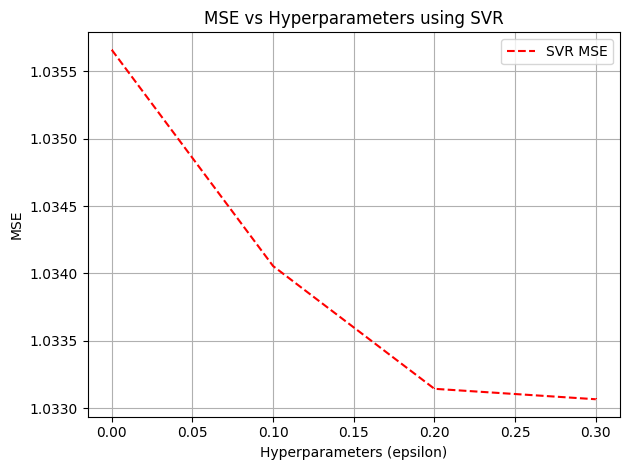

In [ ]:
plt.plot(e_parameters , svr_err_list, marker=',', linestyle='--', color='r', label='SVR MSE')

plt.xlabel('Hyperparameters (epsilon)')
plt.ylabel('MSE')
plt.title('MSE vs Hyperparameters using SVR')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
svr_mse_list

[1.072818621073365,
 1.0131667729371188,
 1.0260518558851062,
 1.019671015835306,
 1.046590417597227,
 1.07054601714682,
 1.0094835007805292,
 1.0225088681846188,
 1.0138142181034224,
 1.0458949541874907,
 1.0698991310630084,
 1.0078002141989983,
 1.0201228159299562,
 1.014612026858825,
 1.0441715648326992,
 1.0692206400982567,
 1.0081776147792845,
 1.0212407641524852,
 1.0177352009119713,
 1.0477925317317602]